# Skin  Cancer


## Table of Contents
* [Problem Statement](#Problem-Statement)
* [Libraries Used](#Loading-Libraries)
* [Reading Datasets](#Reading-Datasets)
* [Data Preparation](#Data-Preparation)
* [View Images](#View-Images)
                                       
* [Model-1](#Model-1)
* [Model-1-Findings](#Model-1-Findings)
   
* [Model-2-DataAugumentation](#Model-2-DataAugumentation)
* [Model-2-DataAugumentation-Findings](#Model-2-DataAugumentation-Findings)

* [Rectify Class-Imbalance](#Class-Imbalance)

* [Model-3 (Post Class Imbalance)](#Model-3-(Post-Class-Imbalance))
* [Model-3 (Post-Class-Imbalance-Findings)](#Model-3(Post-Class-Imbalance-Findings))
* [Testing Validation](#Testing-Validation)
* [Summary](#Summary)




<a name="Problem-Statement"></a>
## Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


### The data set contains the following diseases:

Actinic keratosis

Basal cell carcinoma

Dermatofibroma

Melanoma

Nevus

Pigmented benign keratosis

Seborrheic keratosis

Squamous cell carcinoma

Vascular lesion


# Importing Skin Cancer Data
#### To do: Take necessary actions to read the data


<a name="Loading-Libraries"></a>
## Loading Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


#normalization_layer = tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255)



<a name="Reading-Datasets"></a>
## Reading Datasets

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

#drive.mount('https://drive.google.com/drive/folders/1G1NRARS7CUudpqTPGI2KSgRXZ08lScoS')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
## UNCOMMENT FOR GOOGLE COLAB

# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
# data_dir_train = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Train')
# data_dir_test = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Test')

## UNCOMMENT WHEN WORKING IN LOCAL JUPYTER

data_dir_train = pathlib.Path('Data/Train')
data_dir_test = pathlib.Path('Data/Test')

In [4]:
import os

trainingimages = 0
lst = os.listdir(data_dir_train) # your directory path
print ("TRAINING FOLDER DETAILS")
print ("----------------------")

classname =[]
samplecount=[]
for dirname in lst:
    folderpath = str(data_dir_train) + "\\" + dirname
    lst = os.listdir(folderpath)
    trainingimages += len(lst)
    print (dirname + "\t" + str(len(lst)))
    classname.append(dirname)
    samplecount.append(len(lst))
print ("\nTotal Files  " + str(trainingimages) + "\n\n")
dict = {'classname': classname, 'samplecount': samplecount}
training_ds_summary = pd.DataFrame(dict)

testimages = 0
lst = os.listdir(data_dir_test) # your directory path
print ("TESTING FOLDER DETAILS")
print ("----------------------")

for dirname in lst:
    folderpath = str(data_dir_test) + "\\" + dirname
    lst = os.listdir(folderpath)
    testimages += len(lst)
    print (dirname + "\t" + str(len(lst)))
print ("\nTotal Files  " + str(testimages) + "\n\n")

TRAINING FOLDER DETAILS
----------------------
actinic keratosis	115
basal cell carcinoma	377
dermatofibroma	96
melanoma	439
nevus	358
pigmented benign keratosis	463
seborrheic keratosis	78
squamous cell carcinoma	182
vascular lesion	140

Total Files  2248


TESTING FOLDER DETAILS
----------------------
actinic keratosis	16
basal cell carcinoma	16
dermatofibroma	16
melanoma	16
nevus	16
pigmented benign keratosis	16
seborrheic keratosis	3
squamous cell carcinoma	16
vascular lesion	3

Total Files  118




This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:


image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)



2239
118



<a name="Data-Preparation"></a>
## Data Preparation

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.
Use 80% of the images for training, and 20% for validation.

In [6]:
directory_train = data_dir_train
directory_test = data_dir_test

training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

testing_ds=keras.utils.image_dataset_from_directory(
    directory_test,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = training_ds.class_names
print(class_names)
num_classes = len(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


<a name="View-Images"></a>
## View-Images

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

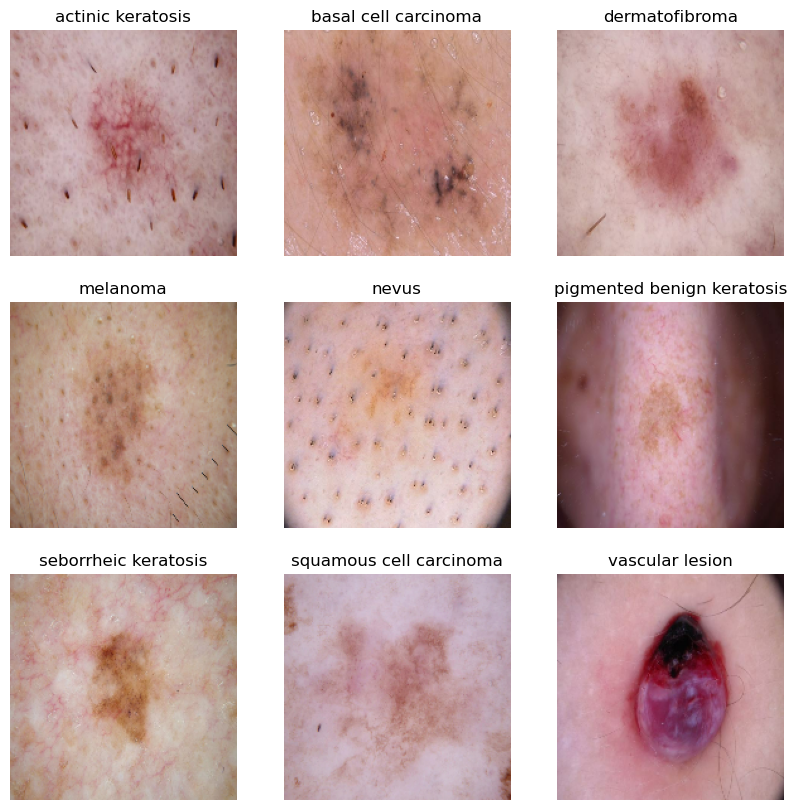

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = training_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a name="Model-1"></a>
## Model-1

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
# ### Your code goes here

# normalization_layer = Rescaling(1./255)

# normalized_training_set = training_ds.map(lambda x, y: (normalization_layer(x), y))
# training_image_batch,training_labels_batch = next(iter(normalized_training_set))

# normalized_validation_set = validation_ds.map(lambda x, y: (normalization_layer(x), y))
# validation_image_batch,validation_labels_batch = next(iter(normalized_validation_set))

# normalized_testing_set = testing_ds.map(lambda x, y: (normalization_layer(x), y))
# testing_image_batch,testing_labels_batch = next(iter(normalized_testing_set))



# training_labels_batch = tf.keras.utils.to_categorical(training_labels_batch, num_classes)
# validation_labels_batch = tf.keras.utils.to_categorical(validation_labels_batch, num_classes)


In [12]:
from keras.optimizers import Adam

model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
# Todo, choose an appropirate optimiser and loss function
def compilemodel(model):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  model.summary() # View the summary of all layers
  return model
model=compilemodel(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:

def trainmodel(model, train_ds, val_ds, epochs):
  from tensorflow.keras.models import load_model
  checkpoint = ModelCheckpoint("best_of_it_model.keras", monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
  earlystop = EarlyStopping(monitor='val_accuracy', patience=8,mode='max', verbose=1)

  history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      callbacks=[checkpoint, earlystop]
  )
  best_model = load_model("best_of_it_model.keras")
  earlystopped_epoch=earlystop.stopped_epoch
    
  if earlystop.stopped_epoch==0:
    epoch_range=epochs
  else:
    epoch_range=earlystop.stopped_epoch+1
    
  return history,best_model,epoch_range

history,best_model,epochs_range = trainmodel(model, training_ds, validation_ds, 50)



Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.2219 - loss: 2.0564
Epoch 1: val_accuracy improved from -inf to 0.42539, saving model to best_of_it_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.2225 - loss: 2.0550 - val_accuracy: 0.4254 - val_loss: 1.6051
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4499 - loss: 1.4307
Epoch 2: val_accuracy improved from 0.42539 to 0.50705, saving model to best_of_it_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 158ms/step - accuracy: 0.4501 - loss: 1.4304 - val_accuracy: 0.5071 - val_loss: 1.3068
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5628 - loss: 1.1778
Epoch 3: val_accuracy improved from 0.50705 to 0.60579, saving model to best_of_it_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.5628 - loss: 1.1778 - val_accuracy: 0.6058 - val_loss: 1.0532
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6346 - loss: 1.0198
Epoch 

<a name="Model-1-Findings"></a>
## Model-1-Findings

### Visualizing training results

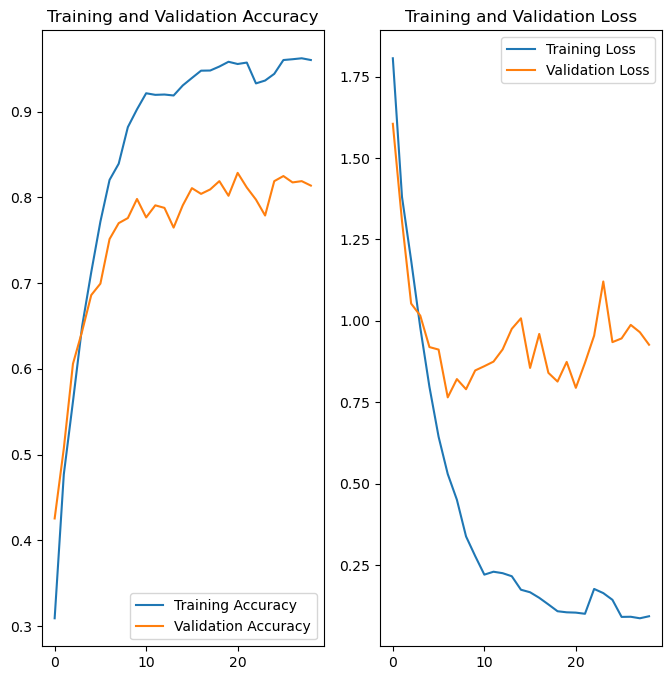

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The Model is Overfitting. There is huge difference between the Training and Validation Accuracy after 50 Epochs.
Training Accuracy:  96%
Validation Accuracy: 81%.

Also the Training losss is very low compared to the Validation loss that further more indicates a overfitting

<a name="Model-2-DataAugumentation"></a>
## Model2-DataAugumentation

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.layers import Layer
import tensorflow as tensorflow
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.2),
                                      layers.RandomBrightness(0.2),
                                      layers.RandomContrast(0.2),
                                      layers.RandomZoom(0.2),
])



C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


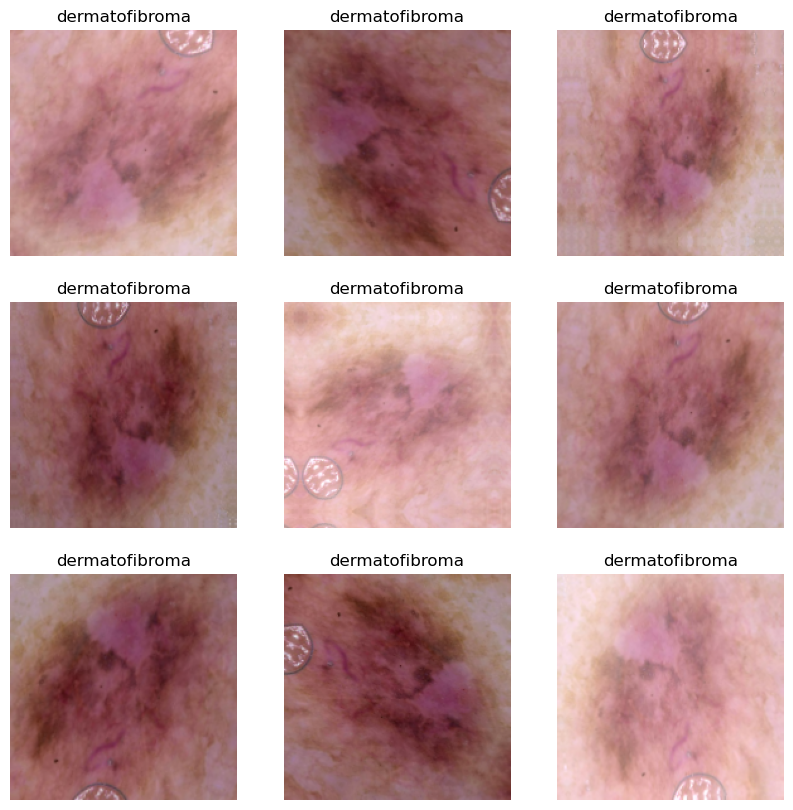

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model2 = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),  # Dropout before the final Dense layer
  layers.Dense(num_classes)
])




### Compiling the model

In [20]:

model2=compilemodel(model2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 50
history2,best_model,epochs_range = trainmodel(model2, training_ds, validation_ds,epochs)


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1388 - loss: 2.4911
Epoch 1: val_accuracy improved from -inf to 0.26652, saving model to best_of_it_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.1389 - loss: 2.4895 - val_accuracy: 0.2665 - val_loss: 2.0220
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.2609 - loss: 1.9269
Epoch 2: val_accuracy improved from 0.26652 to 0.40980, saving model to best_of_it_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 36s 212ms/step - accuracy: 0.2610 - loss: 1.9265 - val_accuracy: 0.4098 - val_loss: 1.6755
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.3323 - loss: 1.7370
Epoch 3: val_accuracy did not improve from 0.40980
169/169 ━━━━━━━━━━━━━━━━━━━━ 36s 210ms/step - accuracy: 0.3323 - loss: 1.7370 - val_accuracy: 0.4098 - val_loss: 1.5886
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3687 - loss: 1.6749
Epoch 4: val_accuracy did not improve from 0.40980

Epoch 25/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4416 - loss: 1.4284
Epoch 25: val_accuracy did not improve from 0.48998
169/169 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.4416 - loss: 1.4284 - val_accuracy: 0.4699 - val_loss: 1.3794
Epoch 25: early stopping


<a name="Model-2-DataAugumentation-Findings"></a>
## Model-2-DataAugumentation-Findings

### Visualizing the results

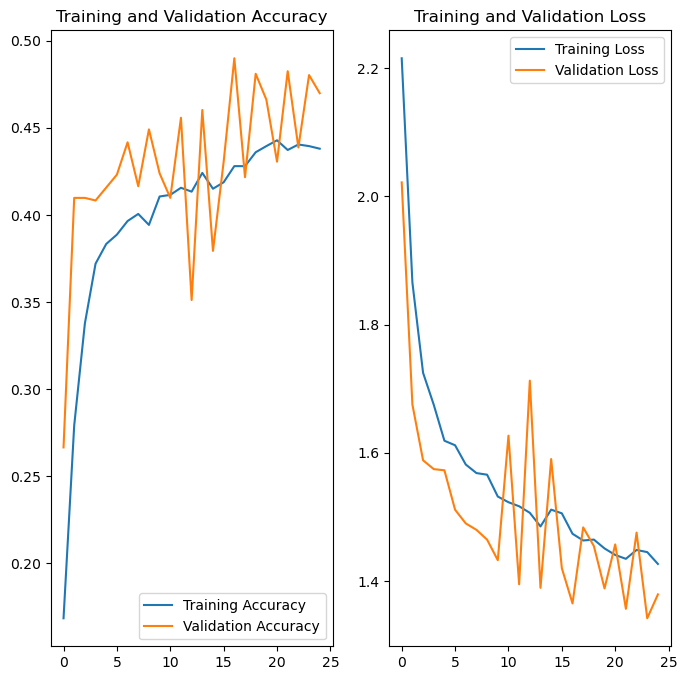

In [22]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The Model is no more Overfitting. The Accuracy Percentages in Training and Validation models are in the same range (same with the training and validation loss). Augumenting the data helped in mitigating the over fitting. 
However the overall accuracy is only 45% which is very low.


#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

C:\Users\mathu\AppData\Local\Temp\ipykernel_28460\3351435489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="classname", x="samplecount", data=training_ds_summary,


<Axes: xlabel='samplecount', ylabel='classname'>

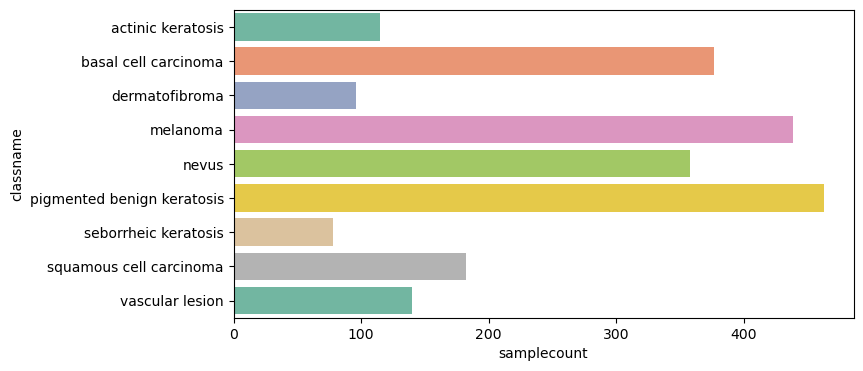

In [23]:
#training_ds_summary.sort_values(by='samplecount',ascending=False).plot.bar(x='classname',y='samplecount')
plt.figure(figsize=(8, 4))
sns.barplot(y="classname", x="samplecount", data=training_ds_summary,
            label="Class",palette='Set2')


There is clearly an Imbalance as there are very few samples for "dermatofibroma" and "seborrheic keratosis" compared to "pigmented benign keratosis". Not having enough samples will lead to overfitting as the model will be restricted to learning from the limited samples 

In [24]:
## RAM: to be removed
## Your code goes here.
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))


2239


<a name="Class-Imbalance"></a>
## Class-Imbalance

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

In [26]:
data_dir_train

WindowsPath('Data/Train')

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "\\" + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Data\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FBEDA22E50>: 100%|█| 500/500 [00:02<00:00, 196.12 Samples


Initialised with 376 image(s) found.
Output directory set to Data\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FBF4A74350>: 100%|█| 500/500 [00:02<00:


Initialised with 95 image(s) found.
Output directory set to Data\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FBED907210>: 100%|█| 500/500 [00:02<00:00, 183.73 Samples


Initialised with 438 image(s) found.
Output directory set to Data\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FBEECA2510>: 100%|█| 500/500 [00:14<00:00, 33.68 Samples


Initialised with 357 image(s) found.
Output directory set to Data\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x1FBF4A4E6D0>: 100%|█| 500/500 [00:13<00:


Initialised with 462 image(s) found.
Output directory set to Data\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FBF4A751D0>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to Data\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1FBE1F49B10>: 100%|█| 500/500 [00:06<00


Initialised with 181 image(s) found.
Output directory set to Data\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FBE1FC4910>: 100%|█| 500/500 [00:02<00:


Initialised with 139 image(s) found.
Output directory set to Data\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FBE1FCC290>: 100%|█| 500/500 [00:02<00:00, 181.61 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train,'*', '*.jpg'))]

path_list_augument = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [30]:
len(path_list_augument)

9000

In [31]:
lesion_list_augument = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [32]:

len(lesion_list_augument)

9000



# VISUALISNG ALL 3 DATAFRAMES by count of classes
### Originial Dataset
### Augumentation
### Consolidated

C:\Users\mathu\AppData\Local\Temp\ipykernel_28460\700544339.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_training_org.classname.value_counts().index, x=df_training_org.classname.value_counts(),label="Class",palette='Set2')


<Axes: xlabel='classname', ylabel='None'>

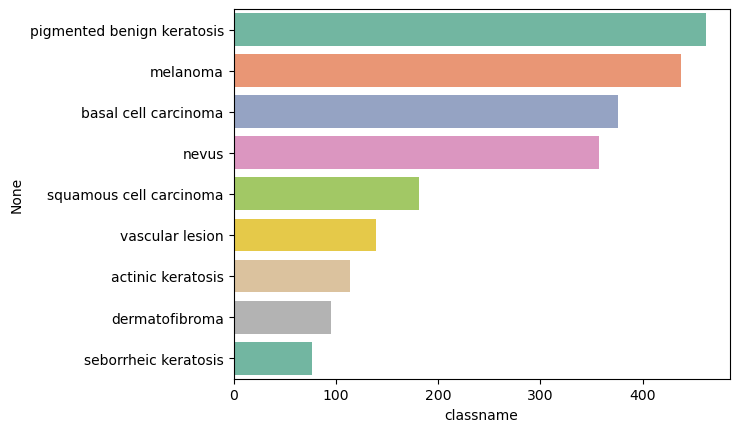

In [33]:
# dataframe_dict_augument = dict(zip(path_list_augument, lesion_list_augument))

# dataframe_dict = dict(zip(path_list, lesion_list))



dataframe_dict = {'classname': lesion_list, 'path': path_list}
df_training_org = pd.DataFrame(dataframe_dict)
#df_training_org['classname'].value_counts().plot.bar()

sns.barplot(y=df_training_org.classname.value_counts().index, x=df_training_org.classname.value_counts(),label="Class",palette='Set2')


C:\Users\mathu\AppData\Local\Temp\ipykernel_28460\3240637908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_training_augument.classname.value_counts().index, x=df_training_augument.classname.value_counts(),label="Class",palette='Set2')


<Axes: xlabel='classname', ylabel='None'>

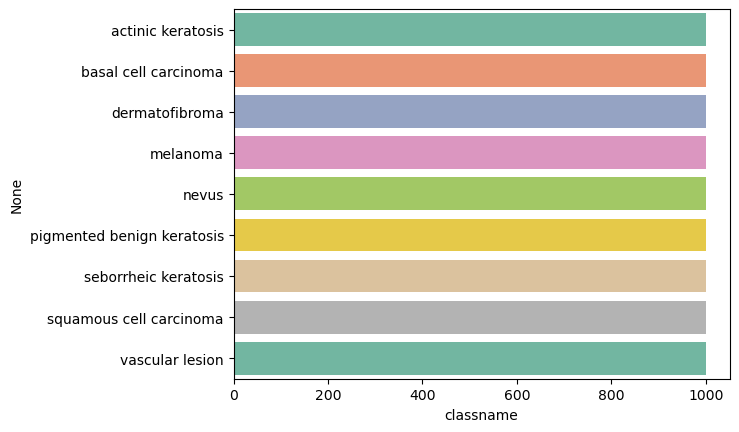

In [34]:
dataframe_augument_dict = {'classname': lesion_list_augument, 'path': path_list_augument}
df_training_augument = pd.DataFrame(dataframe_augument_dict)
sns.barplot(y=df_training_augument.classname.value_counts().index, x=df_training_augument.classname.value_counts(),label="Class",palette='Set2')



So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

C:\Users\mathu\AppData\Local\Temp\ipykernel_28460\3911616889.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_training_consolidated.classname.value_counts().index, x=df_training_consolidated.classname.value_counts(),label="Class",palette='Set2')


<Axes: xlabel='classname', ylabel='None'>

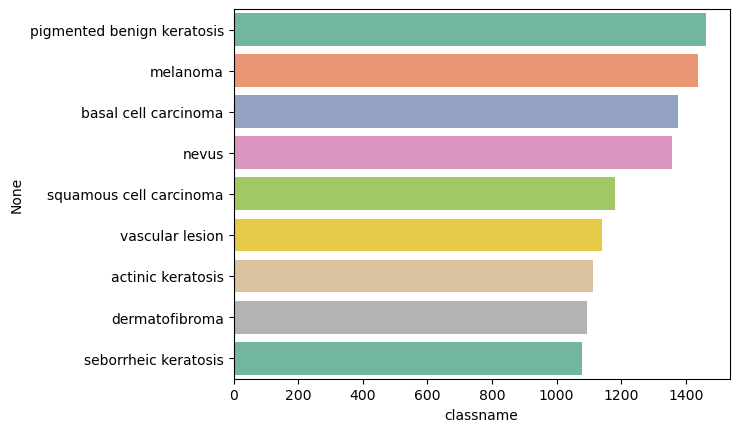

In [35]:
# dataframe_augument_dict = {'classname': lesion_list_augument, 'path': path_list_augument}
# df_training_augument = pd.DataFrame(dataframe_augument_dict)
# df_training_augument['classname'].value_counts().plot.bar()

frames = [df_training_org, df_training_augument]
df_training_consolidated = pd.concat(frames)
sns.barplot(y=df_training_consolidated.classname.value_counts().index, x=df_training_consolidated.classname.value_counts(),label="Class",palette='Set2')


Every class has atleast 550 samples now after the Augumentation. Having suffficient samples in every class helps with better learning

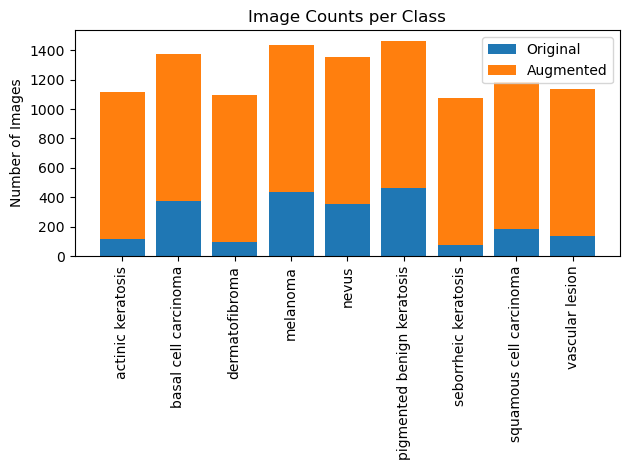

In [36]:
original_img_counts = {category: len(list(glob(os.path.join(data_dir_train, category, '*.jpg')))) for category in class_names}
augmented_img_counts = {category: len(list(glob(os.path.join(data_dir_train, category, 'output', '*.jpg')))) for category in class_names}

fig, ax = plt.subplots()
# Pass class_names as x and the corresponding values from original_img_counts as height
ax.bar(class_names, [original_img_counts.get(name, 0) for name in class_names], label='Original')
ax.bar(class_names, [augmented_img_counts.get(name, 0) for name in class_names], bottom=[original_img_counts.get(name, 0) for name in class_names], label='Augmented')

ax.set_ylabel('Number of Images')
ax.set_title('Image Counts per Class')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name="Model-3-(Post-Class-Imbalance)"></a>
## Model3 (Post Class Imbalance)

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
directory_train = data_dir_train
directory_test = data_dir_test


training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [39]:

validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [40]:
class_names = validation_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Todo:** Create your model (make sure to include normalization)

In [41]:
## your code goes here




model3 = Sequential([
  layers.InputLayer(shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout after the first MaxPooling2D
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout after the second MaxPooling2D
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout after the third MaxPooling2D
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:

model3=compilemodel(model3)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [43]:
epochs = 50
history3,best_model,epochs_range = trainmodel(model3, training_ds, validation_ds,epochs)



Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1645 - loss: 2.3833
Epoch 1: val_accuracy improved from -inf to 0.35202, saving model to best_of_it_model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.1647 - loss: 2.3819 - val_accuracy: 0.3520 - val_loss: 1.6986
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.3886 - loss: 1.5651
Epoch 2: val_accuracy improved from 0.35202 to 0.44281, saving model to best_of_it_model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 56s 198ms/step - accuracy: 0.3888 - loss: 1.5647 - val_accuracy: 0.4428 - val_loss: 1.4855
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5078 - loss: 1.3089
Epoch 3: val_accuracy improved from 0.44281 to 0.56342, saving model to best_of_it_model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.5079 - loss: 1.3087 - val_accuracy: 0.5634 - val_loss: 1.2307
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5622 - loss: 1.1497
Epoch 

281/281 ━━━━━━━━━━━━━━━━━━━━ 51s 183ms/step - accuracy: 0.9271 - loss: 0.1839 - val_accuracy: 0.8518 - val_loss: 0.4574
Epoch 25/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9331 - loss: 0.1696
Epoch 25: val_accuracy did not improve from 0.87316
281/281 ━━━━━━━━━━━━━━━━━━━━ 51s 181ms/step - accuracy: 0.9331 - loss: 0.1696 - val_accuracy: 0.8732 - val_loss: 0.3792
Epoch 26/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9328 - loss: 0.1664
Epoch 26: val_accuracy did not improve from 0.87316
281/281 ━━━━━━━━━━━━━━━━━━━━ 51s 181ms/step - accuracy: 0.9328 - loss: 0.1664 - val_accuracy: 0.8603 - val_loss: 0.4517
Epoch 27/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9202 - loss: 0.1971
Epoch 27: val_accuracy did not improve from 0.87316
281/281 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9203 - loss: 0.1970 - val_accuracy: 0.8545 - val_loss: 0.4730
Epoch 28/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9265 - loss: 0.1845
Epoch 28

<a name="Model-3(Post-Class-Imbalance-Findings)"></a>
## Model3 (Post Class Imbalance Findings)

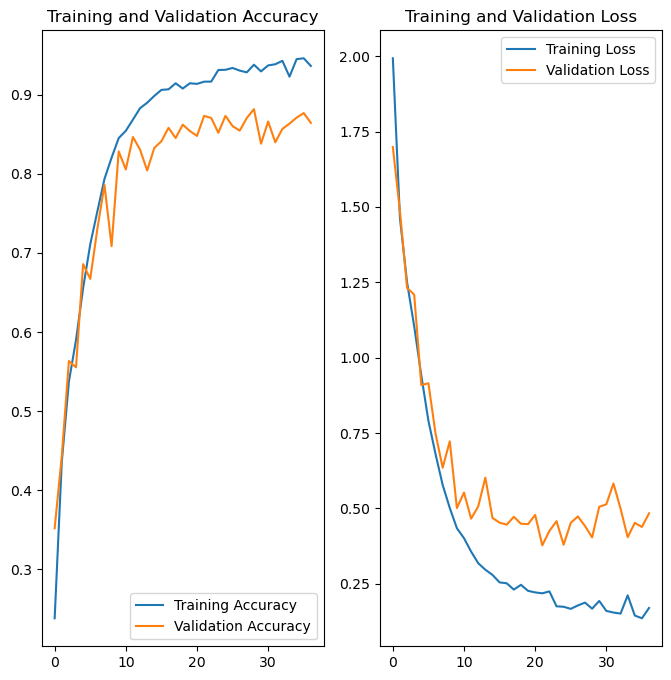

In [44]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Resolving the Class Imbalance helped resolve the overfitting to a large extent.  Overfitting has also reduced given the difference is now 5%

Accuracy Percentages in Training : 91%
Accuracy Percentage in Validation: 86%

<a name="Testing-Validation)"></a>
## Testing Validation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis


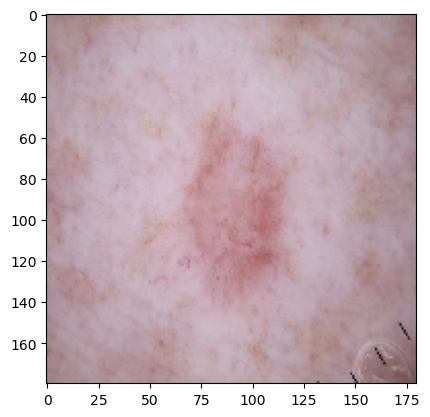

In [45]:
from tensorflow.keras.preprocessing.image import load_img
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = best_model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

#<a name="Summary"></a>
## Summary

#### Three CNN models were developed for skin cancer classification. 

### Model 1: (Using the Datasets as is)
The Model is Overfitting. There is huge difference between the Training and Validation Accuracy after 50 Epochs.
Training Accuracy:  96%
Validation Accuracy: 81%.

### Model 2 (Augumentation). 
The Model is no more Overfitting. The Accuracy Percentages in Training and Validation models are in the same range (same with the training and validation loss). Augumenting the data helped in mitigating the over fitting. 
However the overall accuracy is only 45% which is very low.

### Model 3 (Addressed ClassImbalance)
Resolving the Class Imbalance helped resolve the overfitting to a large extent.  Overfitting has also reduced given the difference is now 5%

Accuracy Percentages in Training : 91%
Accuracy Percentage in Validation: 86%

However, test accuracy remained low (~40%). Enhanced model complexity or transfer learning is suggested to improve performance. Augmentor's data augmentation effectively balanced class distribution, contributing significantly to the improved results.